In [1]:
import pandas as pd

In [2]:
countries = ['Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda',
             'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan',
             'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
             'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia']

life_expectancy_values = [74.7,  75. ,  83.4,  57.6,  74.6,  75.4,  72.3,  81.5,  80.2,
                          70.3,  72.1,  76.4,  68.1,  75.2,  69.8,  79.4,  70.8,  62.7,
                          67.3,  70.6]

gdp_values = [ 1681.61390973,   2155.48523109,  21495.80508273,    562.98768478,
              13495.1274663 ,   9388.68852258,   1424.19056199,  24765.54890176,
              27036.48733192,   1945.63754911,  21721.61840978,  13373.21993972,
                483.97086804,   9783.98417323,   2253.46411147,  25034.66692293,
               3680.91642923,    366.04496652,   1175.92638695,   1132.21387981]

In [3]:
# Life expectancy and gdp data in 2007 for 20 countries
life_expectancy = pd.Series(life_expectancy_values)
gdp = pd.Series(gdp_values)

In [4]:
# Accessing elements and slicing
if True:
    print life_expectancy[0]
    print gdp[3:6]

74.7
3      562.987685
4    13495.127466
5     9388.688523
dtype: float64


In [5]:
# Looping
if True:
    for country_life_expectancy in life_expectancy:
        print 'Examining life expectancy {}'.format(country_life_expectancy)

Examining life expectancy 74.7
Examining life expectancy 75.0
Examining life expectancy 83.4
Examining life expectancy 57.6
Examining life expectancy 74.6
Examining life expectancy 75.4
Examining life expectancy 72.3
Examining life expectancy 81.5
Examining life expectancy 80.2
Examining life expectancy 70.3
Examining life expectancy 72.1
Examining life expectancy 76.4
Examining life expectancy 68.1
Examining life expectancy 75.2
Examining life expectancy 69.8
Examining life expectancy 79.4
Examining life expectancy 70.8
Examining life expectancy 62.7
Examining life expectancy 67.3
Examining life expectancy 70.6


In [6]:
# Pandas functions
if True:
    print life_expectancy.mean()
    print life_expectancy.std()
    print gdp.max()
    print gdp.sum()

72.87
6.21399947487
27036.48733192
182957.59832967006


In [7]:
# Vectorized operations and index arrays
if True:
    a = pd.Series([1, 2, 3, 4])
    b = pd.Series([1, 2, 1, 2])
  
    print a + b
    print a * 2
    print a >= 3
    print a[a >= 3]

0    2
1    4
2    4
3    6
dtype: int64
0    2
1    4
2    6
3    8
dtype: int64
0    False
1    False
2     True
3     True
dtype: bool
2    3
3    4
dtype: int64


Fill in this function to calculate the number of data points for which
the directions of variable1 and variable2 relative to the mean are the
same, and the number of data points for which they are different.
Direction here means whether each value is above or below its mean.

You can classify cases where the value is equal to the mean for one or
both variables however you like.

Each argument will be a Pandas series.

For example, if the inputs were pd.Series([1, 2, 3, 4]) and
pd.Series([4, 5, 6, 7]), then the output would be (4, 0).
This is because 1 and 4 are both below their means, 2 and 5 are both
below, 3 and 6 are both above, and 4 and 7 are both above.

On the other hand, if the inputs were pd.Series([1, 2, 3, 4]) and
pd.Series([7, 6, 5, 4]), then the output would be (0, 4).
This is because 1 is below its mean but 7 is above its mean, and
so on.

In [8]:
def variable_correlation(variable1, variable2):
    both_above = (variable1 > variable1.mean()) & (variable2> variable2.mean())
    both_below = (variable1 < variable1.mean()) & (variable2 < variable2.mean())
    is_same_direction = both_above | both_below
    num_same_direction = is_same_direction.sum()
    num_different_direction = len(variable1) - num_same_direction
    
    return (num_same_direction, num_different_direction)

In [9]:
variable_correlation(life_expectancy,gdp)

(17, 3)

In [10]:
variable_correlation(pd.Series([1, 2, 3, 4]),pd.Series([4, 5, 6, 7]))

(4, 0)

In [11]:
countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Angola',
    'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
    'Barbados', 'Belarus', 'Belgium', 'Belize',
    'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
]


employment_values = [
    55.70000076,  51.40000153,  50.5       ,  75.69999695,
    58.40000153,  40.09999847,  61.5       ,  57.09999847,
    60.90000153,  66.59999847,  60.40000153,  68.09999847,
    66.90000153,  53.40000153,  48.59999847,  56.79999924,
    71.59999847,  58.40000153,  70.40000153,  41.20000076,
]

# Employment data in 2007 for 20 countries
employment = pd.Series(employment_values, index=countries)

    Fill in this function to return the name of the country
    with the highest employment in the given employment
    data, and the employment in that country.
    
    The input will be a Pandas series where the values
    are employment and the index is country names.
    
    Try using the Pandas idxmax() function. Documention can
    be found here:
    http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.idxmax.html

In [12]:
def max_employment(employment):
    max_country = employment.idxmax()
    max_value = employment.loc[employment.idxmax()]

    return (max_country, max_value)
max_employment(employment)

('Angola', 75.69999695)

In [13]:
# Addition when indexes are the same
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['a', 'b', 'c', 'd'])
    print s1 + s2

a    11
b    22
c    33
d    44
dtype: int64


In [14]:
# Indexes have same elements in a different order
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['b', 'd', 'a', 'c'])
    print s1 + s2

a    31
b    12
c    43
d    24
dtype: int64


In [15]:
# Indexes overlap, but do not have exactly the same elements
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])
    print s1 + s2

a     NaN
b     NaN
c    13.0
d    24.0
e     NaN
f     NaN
dtype: float64


In [16]:
# Indexes do not overlap
if True:
    s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
    s2 = pd.Series([10, 20, 30, 40], index=['e', 'f', 'g', 'h'])
    print s1 + s2

a   NaN
b   NaN
c   NaN
d   NaN
e   NaN
f   NaN
g   NaN
h   NaN
dtype: float64


In [17]:
# Try to write code that will add the 2 previous series together,
# but treating missing values from either series as 0. The result
# when printed out should be similar to the following line:
# print pd.Series([1, 2, 13, 24, 30, 40], index=['a', 'b', 'c', 'd', 'e', 'f'])

s1 = pd.Series([1, 2, 3, 4], index=['a', 'b', 'c', 'd'])
s2 = pd.Series([10, 20, 30, 40], index=['c', 'd', 'e', 'f'])

print s1.add(s2, fill_value=0)

a     1.0
b     2.0
c    13.0
d    24.0
e    30.0
f    40.0
dtype: float64


In [18]:
# Change False to True to see what the following block of code does

# Example pandas apply() usage (although this could have been done
# without apply() using vectorized operations)
if True:
    s = pd.Series([1, 2, 3, 4, 5])
    def add_one(x):
        return x + 1
    print s.apply(add_one)

0    2
1    3
2    4
3    5
4    6
dtype: int64


    '''
    Fill in this function to return a new series where each name
    in the input series has been transformed from the format
    "Firstname Lastname" to "Lastname, FirstName".
    
    Try to use the Pandas apply() function rather than a loop.
    '''

In [19]:
names = pd.Series([
    'Andre Agassi',
    'Barry Bonds',
    'Christopher Columbus',
    'Daniel Defoe',
    'Emilio Estevez',
    'Fred Flintstone',
    'Greta Garbo',
    'Humbert Humbert',
    'Ivan Ilych',
    'James Joyce',
    'Keira Knightley',
    'Lois Lane',
    'Mike Myers',
    'Nick Nolte',
    'Ozzy Osbourne',
    'Pablo Picasso',
    'Quirinus Quirrell',
    'Rachael Ray',
    'Susan Sarandon',
    'Tina Turner',
    'Ugueth Urbina',
    'Vince Vaughn',
    'Woodrow Wilson',
    'Yoji Yamada',
    'Zinedine Zidane'
])
def reverse_name(name):
    split_name = name.split(' ')
    first_name = split_name[0]
    last_name = split_name[1]
    return last_name+", "+first_name
print(reverse_name(names.iloc[0]))
def reverse_names(names):
    return names.apply(reverse_name)
print reverse_names(names)

Agassi, Andre
0             Agassi, Andre
1              Bonds, Barry
2     Columbus, Christopher
3             Defoe, Daniel
4           Estevez, Emilio
5          Flintstone, Fred
6              Garbo, Greta
7          Humbert, Humbert
8               Ilych, Ivan
9              Joyce, James
10         Knightley, Keira
11               Lane, Lois
12              Myers, Mike
13              Nolte, Nick
14           Osbourne, Ozzy
15           Picasso, Pablo
16       Quirrell, Quirinus
17             Ray, Rachael
18          Sarandon, Susan
19             Turner, Tina
20           Urbina, Ugueth
21            Vaughn, Vince
22          Wilson, Woodrow
23             Yamada, Yoji
24         Zidane, Zinedine
dtype: object


In [20]:
#import seaborn as sns

path = './material_unidimensionais/'
employment = pd.read_csv(path + 'employment_above_15.csv', index_col='Country')
female_completion = pd.read_csv(path + 'female_completion_rate.csv', index_col='Country')
male_completion = pd.read_csv(path + 'male_completion_rate.csv', index_col='Country')
life_expectancy = pd.read_csv(path + 'life_expectancy.csv', index_col='Country')
gdp = pd.read_csv(path + 'gdp_per_capita.csv', index_col='Country')

# The following code creates a Pandas Series for each variable for the United States.
# You can change the string 'United States' to a country of your choice.

employment_us = employment.loc['United States']
female_completion_us = female_completion.loc['United States']
male_completion_us = male_completion.loc['United States']
life_expectancy_us = life_expectancy.loc['United States']
gdp_us = gdp.loc['United States']

employment_br = employment.loc['Brazil']
female_completion_br = female_completion.loc['Brazil']
male_completion_br = male_completion.loc['Brazil']
life_expectancy_br = life_expectancy.loc['Brazil']
gdp_br = gdp.loc['Brazil']

#country names:
#print employment.index.values

In [30]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


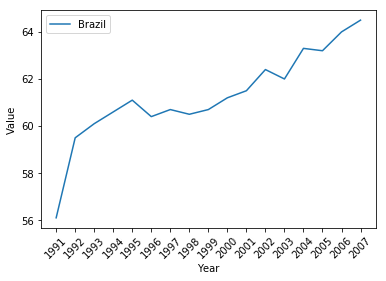

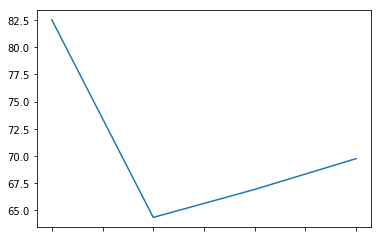

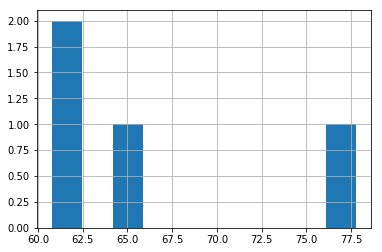

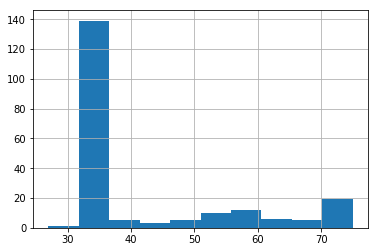

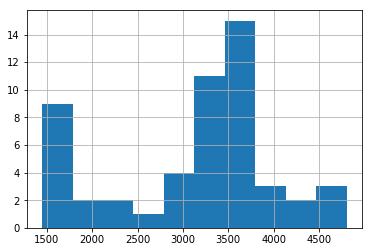

In [65]:
ax = employment_br.plot(legend=True)
ax.set(xlabel='Year', ylabel='Value')
plt.xticks(np.arange(len(employment_br.index)), employment_br.index, rotation=45)
plt.show()
female_completion_br.plot()
plt.show()
male_completion_br.hist()
plt.show()
life_expectancy_br.hist()
plt.show()
gdp_br.hist()

In [71]:
employment_br.index

Index([u'1991', u'1992', u'1993', u'1994', u'1995', u'1996', u'1997', u'1998',
       u'1999', u'2000', u'2001', u'2002', u'2003', u'2004', u'2005', u'2006',
       u'2007'],
      dtype='object')